In [1]:
#raw_text = "This is an example sentence with <html> tags and a URL https://example.com. It also has some stop words.
import pandas as pd
review_data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
review_data.columns


cols= ['Age','Clothing ID', 'Division Name', 'Department Name', 'Class Name']
df_review = review_data.drop(cols, axis=1)


In [2]:
#df_review['Rating'] = df_review['Rating'].fillna(0)
df_review['Recommended IND'] = df_review['Recommended IND'].fillna(0)
df_review['Positive Feedback Count'] = df_review['Positive Feedback Count'].fillna(0)
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Title                    19676 non-null  object
 2   Review Text              22641 non-null  object
 3   Rating                   23486 non-null  int64 
 4   Recommended IND          23486 non-null  int64 
 5   Positive Feedback Count  23486 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [3]:
df_review.head()

,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4
2,2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0
3,3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6


In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(x):
    # Check if x is not NaN
    if isinstance(x, str):
        # Lowercase function - Make all text lower case
        x = x.lower()

        # Replace words with @ with blank
        x = re.sub('\S*@\S*\s?', '', x)

        # Replace special characters with blank
        x = re.sub('[^\w\s]', '', x)

        # Tokenize
        words = word_tokenize(x)

        # Remove punctuation
        words = [w for w in words if w.isalnum()]

        # Remove stopwords
        words = [w for w in words if w not in stop_words]

        # Lemmatize the text data
        words = [lemmer.lemmatize(w) for w in words]

        # Stemming
        words = [stemmer.stem(w) for w in words]
        
        # Remove consecutive duplicate words
        unique_words = [words[i] for i in range(len(words)) if i == 0 or words[i] != words[i-1]]

        return ' '.join(unique_words)
    else:
        return ''  # Return an empty string for NaN values

# Assuming df_review is your DataFrame
df_review['Preprocessed Review Text'] = df_review['Review Text'].apply(preprocess)
df_review.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohithgoud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rohithgoud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Preprocessed Review Text
0,0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,absolut wonder silki sexi comfort
1,1,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,love dress sooo pretti happen find store im gl...
2,2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,high hope dress realli want work initi order p...
3,3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,love jumpsuit fun flirti fabul everi time wear...
4,4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,shirt flatter due adjust front tie perfect len...


In [5]:
df_review=df_review.drop(['Unnamed: 0'], axis=1)

In [6]:
df_review.shape

(23486, 6)

Epoch 1/10
470/470 [==============================] - 6s 12ms/step - loss: 0.2048 - accuracy: 0.9100 - val_loss: 0.1431 - val_accuracy: 0.9359
Epoch 2/10
470/470 [==============================] - 5s 12ms/step - loss: 0.1358 - accuracy: 0.9436 - val_loss: 0.1532 - val_accuracy: 0.9351
Epoch 3/10
470/470 [==============================] - 5s 11ms/step - loss: 0.1229 - accuracy: 0.9511 - val_loss: 0.1631 - val_accuracy: 0.9364


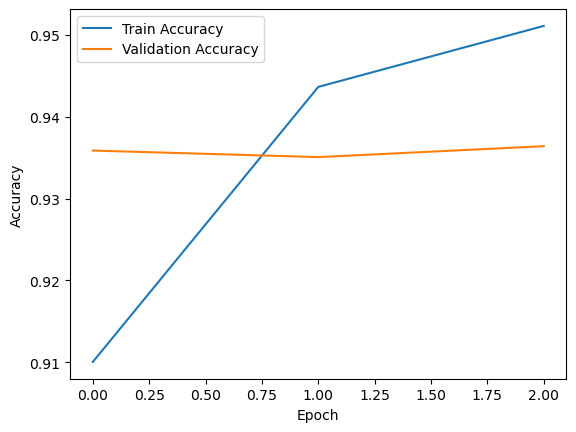

147/147 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9336
Learning Rate: 0.01, Test Loss: 0.15216323733329773, Test Accuracy: 0.9335887432098389


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Concatenate, Flatten, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have a DataFrame named df_review with the necessary columns

# Data preprocessing
df_review['Title'] = df_review['Title'].astype(str)
df_review['Preprocessed Review Text'] = df_review['Preprocessed Review Text'].astype(str)
df_review['Rating'] = df_review['Rating'].astype(int)
df_review['Recommended IND'] = df_review['Recommended IND'].astype(int)
df_review['Positive Feedback Count'] = df_review['Positive Feedback Count'].astype(int)

# Combine 'Title' and 'Preprocessed Review Text' into a single input feature
df_review['Combined Text'] = df_review['Title'] + ' ' + df_review['Preprocessed Review Text']

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_review, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['Combined Text'])

X_train_sequences = tokenizer.texts_to_sequences(train_data['Combined Text'])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)

X_test_sequences = tokenizer.texts_to_sequences(test_data['Combined Text'])
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

y_train = train_data['Recommended IND'].values
y_test = test_data['Recommended IND'].values

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(units=10))
model.add(Dropout(0.5))

# Optional: Add other features (Rating, Recommended IND, Positive Feedback Count)
additional_features = ['Rating', 'Positive Feedback Count']
additional_input = Sequential()
additional_input.add(Dense(8, input_dim=len(additional_features), activation='relu'))

# Merge the models
merged = Concatenate()([model.output, additional_input.output])
merged = Flatten()(merged)

# Output layer
merged = Dense(1, activation='sigmoid')(merged)

final_model = Model(inputs=[model.input, additional_input.input], outputs=merged)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=0.01)
final_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with early stopping callback
history = final_model.fit(
    [X_train_padded, train_data[additional_features]],
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss, accuracy = final_model.evaluate([X_test_padded, test_data[additional_features]], y_test)
print(f'Learning Rate: 0.01, Test Loss: {loss}, Test Accuracy: {accuracy}')




import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have a DataFrame named df_review with the necessary columns

# Data preprocessing
df_review['Combined Text'] = df_review['Title'] + ' ' + df_review['Preprocessed Review Text']

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_review, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['Combined Text'])

X_train_sequences = tokenizer.texts_to_sequences(train_data['Combined Text'])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)

X_test_sequences = tokenizer.texts_to_sequences(test_data['Combined Text'])
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

y_train = train_data['Recommended IND'].values
y_test = test_data['Recommended IND'].values

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(LSTM(units=50))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping callback
history = model.fit(
    X_train_padded,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.3,
    callbacks=[early_stopping]
)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Learning Rate: 0.001, Test Loss: {loss}, Test Accuracy: {accuracy}')


In [8]:
# Predict probabilities on the test set
y_pred_prob = final_model.predict([X_test_padded, test_data[additional_features]])

# Assign sentiment based on a threshold (e.g., 0.5)
threshold = 0.7
test_data['Predicted Sentiment'] = ['Positive' if prob > threshold else 'Negative' for prob in y_pred_prob]

# Display the DataFrame with the predicted sentiment column
print(test_data[['Preprocessed Review Text','Combined Text','Recommended IND', 'Predicted Sentiment']])

147/147 [==============================] - 0s 2ms/step
                                Preprocessed Review Text  \
1297   agre review color isnt pink person subtl thoug...   
7228               mani sweater bought sale soft comfort   
21410  beauti top run whole size small gave daughter ...   
8358   love pantsthey comfort howev wear twice thread...   
20840  order dress petit arriv regular rest fit meant...   
...                                                  ...   
14625  cute modest length perfect flowi top wedg date...   
795    love blous top true sizeim gener decid tri pl ...   
396    sweater fine casual day bought cream say one w...   
19843  hard guess fit size carri weight tummi order x...   
17617  normal wear medium everyth bet x wouldv mayb f...   

                                           Combined Text  Recommended IND  \
1297   Size up if busty agre review color isnt pink p...                1   
7228   Snap front hoodie mani sweater bought sale sof...              

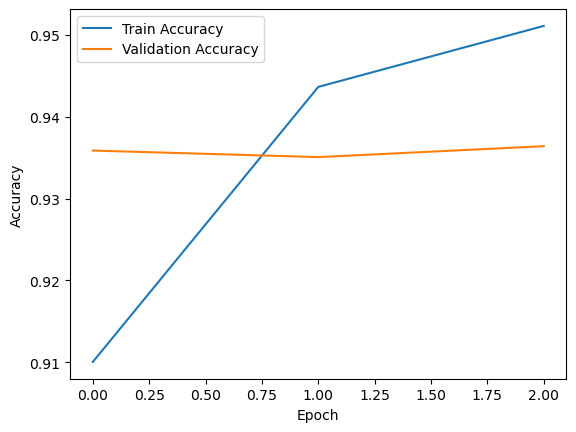

147/147 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9336
Test Loss: 0.15216323733329773, Test Accuracy: 0.9335887432098389


In [9]:
import matplotlib.pyplot as plt


# Train the model and save the training history
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss, accuracy = final_model.evaluate([X_test_padded, test_data[additional_features]], y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


In [10]:
# Assuming you have new data in a DataFrame named new_data
new_data['Combined Text'] = new_data['Title'] + ' ' + new_data['Preprocessed Review Text']

X_new_sequences = tokenizer.texts_to_sequences(new_data['Combined Text'])
X_new_padded = pad_sequences(X_new_sequences, maxlen=max_len)

# Assuming additional_features for new data is available in a DataFrame named new_data
predictions = final_model.predict([X_new_padded, new_data[additional_features]])

# The predictions array now contains the model's predictions for the new data


NameError: name 'new_data' is not defined

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Assuming df_review is your DataFrame
df_review['Preprocessed Review Text'] = df_review['Review Text'].apply(preprocess)

# Combine 'Title' and 'Preprocessed Review Text' into a single input feature
df_review['Combined Text'] = df_review['Title'] + ' ' + df_review['Preprocessed Review Text']

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_review, test_size=0.2, random_state=42)

# Use TF-IDF for text vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Combined Text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Combined Text'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Sentiment'])
y_test = label_encoder.transform(test_data['Sentiment'])


In [50]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create and train the SVM model for multi-class classification
svm_model = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
report_svm = classification_report(y_test, y_pred_svm)

print('SVM Classification Report:\n', report_svm)
print(f'SVM Test Accuracy: {accuracy_svm * 100:.2f}%')



SVM Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.44      0.44       620
           1       0.34      0.16      0.22       153
           2       0.76      0.92      0.84      2591
           3       0.40      0.24      0.30       317
           4       0.49      0.33      0.39      1017

    accuracy                           0.66      4698
   macro avg       0.49      0.42      0.44      4698
weighted avg       0.62      0.66      0.63      4698

SVM Test Accuracy: 90.08%


In [51]:
predicted_sentiment_classes = label_encoder.inverse_transform(y_pred_svm)

# Print test dataset and its predicted sentiment
test_data['Predicted Sentiment'] = predicted_sentiment_classes

# Display the test dataset and predicted sentiment
print("\nTest Dataset with Predicted Sentiment:")
print(test_data[['Combined Text', 'Sentiment', 'Predicted Sentiment']])



Test Dataset with Predicted Sentiment:
                                           Combined Text        Sentiment  \
1297   Size up if busty agre review color isnt pink p...    Weak Positive   
7228   Snap front hoodie mani sweater bought sale sof...    Weak Positive   
21410  Adorable beauti top run whole size small gave ...    Weak Positive   
8358   Fraying after 2 wears! love pantsthey comfort ...          Neutral   
20840  Fabulous material.... order dress petit arriv ...  Strong Positive   
...                                                  ...              ...   
14625  nan cute modest length perfect flowi top wedg ...  Strong Positive   
795    Feminine and tts love blous top true sizeim ge...  Strong Positive   
396    Comfy, but not made to last sweater fine casua...          Neutral   
19843  Nice pants but size down hard guess fit size c...    Weak Positive   
17617  nan normal wear medium everyth bet x wouldv ma...          Neutral   

      Predicted Sentiment  
1297   

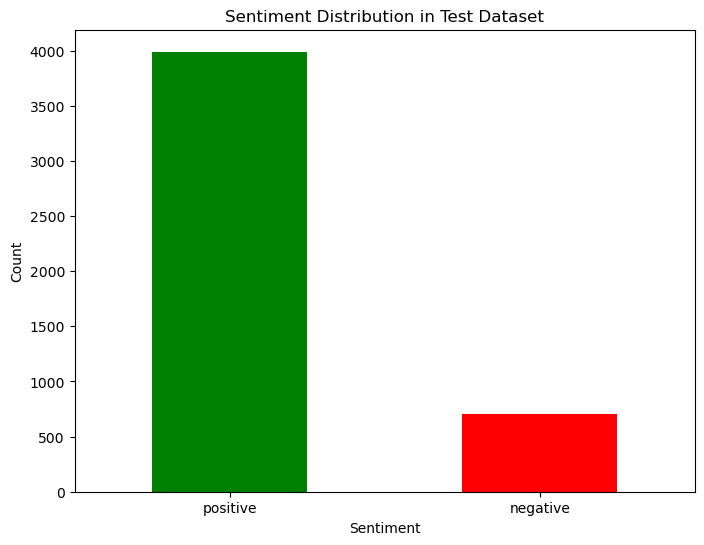

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment class in the test dataset
sentiment_counts = test_data['Predicted Sentiment'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution in Test Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict sentiment using the trained Naive Bayes model
y_pred_nb = nb_model.predict(X_test_tfidf)

# Convert predicted labels to sentiment classes
predicted_sentiment_classes_nb = label_encoder.inverse_transform(y_pred_nb)

# Map numerical labels to "positive" or "negative"
predicted_sentiment_nb = ['positive' if label == 1 else 'negative' for label in predicted_sentiment_classes_nb]

# Add predicted sentiment to the test_data DataFrame
test_data['Predicted Sentiment (Naive Bayes)'] = predicted_sentiment_nb

# Display the test_data DataFrame with predicted sentiment
print("\nTest Data with Predicted Sentiment (Naive Bayes):")
print(test_data[['Combined Text', 'Recommended IND', 'Predicted Sentiment (Naive Bayes)']])

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f'\nNaive Bayes Test Accuracy: {accuracy_nb * 100:.2f}%')
print('Naive Bayes Classification Report:\n', report_nb)



Test Data with Predicted Sentiment (Naive Bayes):
                                           Combined Text  Recommended IND  \
1297   Size up if busty agre review color isnt pink p...                1   
7228   Snap front hoodie mani sweater bought sale sof...                1   
21410  Adorable beauti top run whole size small gave ...                1   
8358   Fraying after 2 wears! love pantsthey comfort ...                0   
20840  Fabulous material.... order dress petit arriv ...                1   
...                                                  ...              ...   
14625  nan cute modest length perfect flowi top wedg ...                1   
795    Feminine and tts love blous top true sizeim ge...                1   
396    Comfy, but not made to last sweater fine casua...                0   
19843  Nice pants but size down hard guess fit size c...                1   
17617  nan normal wear medium everyth bet x wouldv ma...                0   

      Predicted Sentimen

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_review is your DataFrame with 'Review' and 'Rating' columns
# Perform data labeling for five sentiment classes
df_review['Sentiment'] = pd.cut(df_review['Rating'], bins=[0, 1, 2, 3, 4, 5],
                                labels=['Strong Negative', 'Weak Negative', 'Neutral', 'Weak Positive', 'Strong Positive'])

# Split the data
train_data, test_data = train_test_split(df_review, test_size=0.2, random_state=42)

# Use LabelEncoder to transform sentiment classes to numerical labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Sentiment'])

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Combined Text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Combined Text'])

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Convert predicted labels to sentiment classes
predicted_sentiment_nb = label_encoder.inverse_transform(y_pred_nb)

# Add predicted sentiment to the test_data DataFrame
test_data['Predicted Sentiment (Naive Bayes)'] = predicted_sentiment_nb

# Display the test_data DataFrame with predicted sentiment
print("\nTest Data with Predicted Sentiment (Naive Bayes):")
print(test_data[['Combined Text', 'Sentiment', 'Predicted Sentiment (Naive Bayes)']])




Test Data with Predicted Sentiment (Naive Bayes):
                                           Combined Text        Sentiment  \
1297   Size up if busty agre review color isnt pink p...    Weak Positive   
7228   Snap front hoodie mani sweater bought sale sof...    Weak Positive   
21410  Adorable beauti top run whole size small gave ...    Weak Positive   
8358   Fraying after 2 wears! love pantsthey comfort ...          Neutral   
20840  Fabulous material.... order dress petit arriv ...  Strong Positive   
...                                                  ...              ...   
14625  nan cute modest length perfect flowi top wedg ...  Strong Positive   
795    Feminine and tts love blous top true sizeim ge...  Strong Positive   
396    Comfy, but not made to last sweater fine casua...          Neutral   
19843  Nice pants but size down hard guess fit size c...    Weak Positive   
17617  nan normal wear medium everyth bet x wouldv ma...          Neutral   

      Predicted Sentimen

In [43]:
# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(label_encoder.transform(test_data['Sentiment']), y_pred_nb)
report_nb = classification_report(label_encoder.transform(test_data['Sentiment']), y_pred_nb, zero_division=1)

print(f'\nNaive Bayes Test Accuracy: {accuracy_nb * 100:.2f}%')
print('Naive Bayes Classification Report:\n', report_nb)



Naive Bayes Test Accuracy: 59.24%
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.14      0.21       620
           1       1.00      0.00      0.00       153
           2       0.62      0.99      0.76      2591
           3       0.25      0.00      0.01       317
           4       0.36      0.13      0.19      1017

    accuracy                           0.59      4698
   macro avg       0.53      0.25      0.23      4698
weighted avg       0.53      0.59      0.49      4698

